# Force-displacement curve

### Importerer nødvendige bibliotek

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import preprocessing

### Preprosesser dataen
- Henter data
- Skalerer data
- Splitter data

In [10]:
data = pd.DataFrame()
for number in range(1, 101):
    new_data = pd.read_csv('FORCE_DISPLACEMENT_CRUSHING_100/CRUSH_' + str(number) + '_data.csv')
    new_data.iloc[:, 0] = number
    data = pd.concat([data, new_data])   
data = data.iloc[:, 0:3]

metadata = pd.read_csv('/Users/magnufoy/ML prosjekt/Max_Mean_force/data_CRUSHING_100.csv').iloc[:, 0:4]
metadata_100100=pd.DataFrame()
for number in range(0, 100):
    for i in range(1001):
        metadata_100100 = pd.concat([metadata_100100, metadata.iloc[number, :].to_frame().T])

dataframe = metadata_100100.merge(data, left_on='model', right_on='*time')
dataframe.head()

,model,sigma0,t,w,*time,DMM,FKN
0,1.0,218.460118,2.86173,65.050123,1.0,0.000000e+00,0.0
1,1.0,218.460118,2.86173,65.050123,1.0,4.751515e-07,0.0
2,1.0,218.460118,2.86173,65.050123,1.0,6.712080e-06,0.0
3,1.0,218.460118,2.86173,65.050123,1.0,3.231573e-05,0.0
4,1.0,218.460118,2.86173,65.050123,1.0,1.047788e-04,0.0


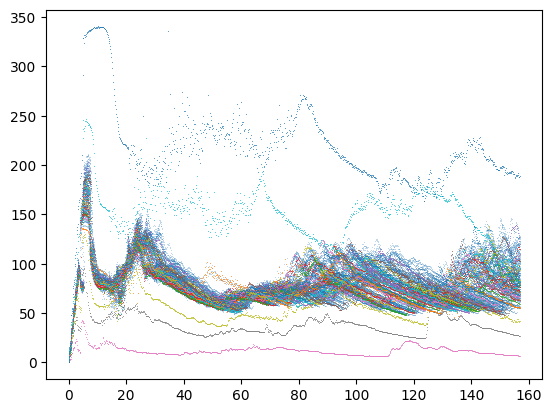

In [11]:
plt.scatter(data.iloc[:, 1], data.iloc[:, 2], s=0.1, linewidth=0)

data = pd.DataFrame()
for number in range(1, 31):
    new_data = pd.read_csv('FORCE_DISPLACEMENT_CRUSHING/CRUSH_' + str(number) + '_data.csv')
    data = pd.concat([data, new_data])
    plt.scatter(new_data.iloc[:, 1], new_data.iloc[:, 2], s=0.3, linewidth=0)
    #plt.plot(new_data.iloc[:, 1], new_data.iloc[:, 2], linewidth=0.2)
#plt.scatter(data.iloc[:, 1], data.iloc[:, 2], s=0.1, linewidth=0)


#data1 = pd.read_csv('FORCE_DISPLACEMENT_CRUSHING/CRUSH_1_data.csv')
#plt.plot(data1.iloc[:, 1], data1.iloc[:, 2])

In [12]:
dataframe.to_csv('combined_data.csv')